In [32]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [14]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None)
df.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [16]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


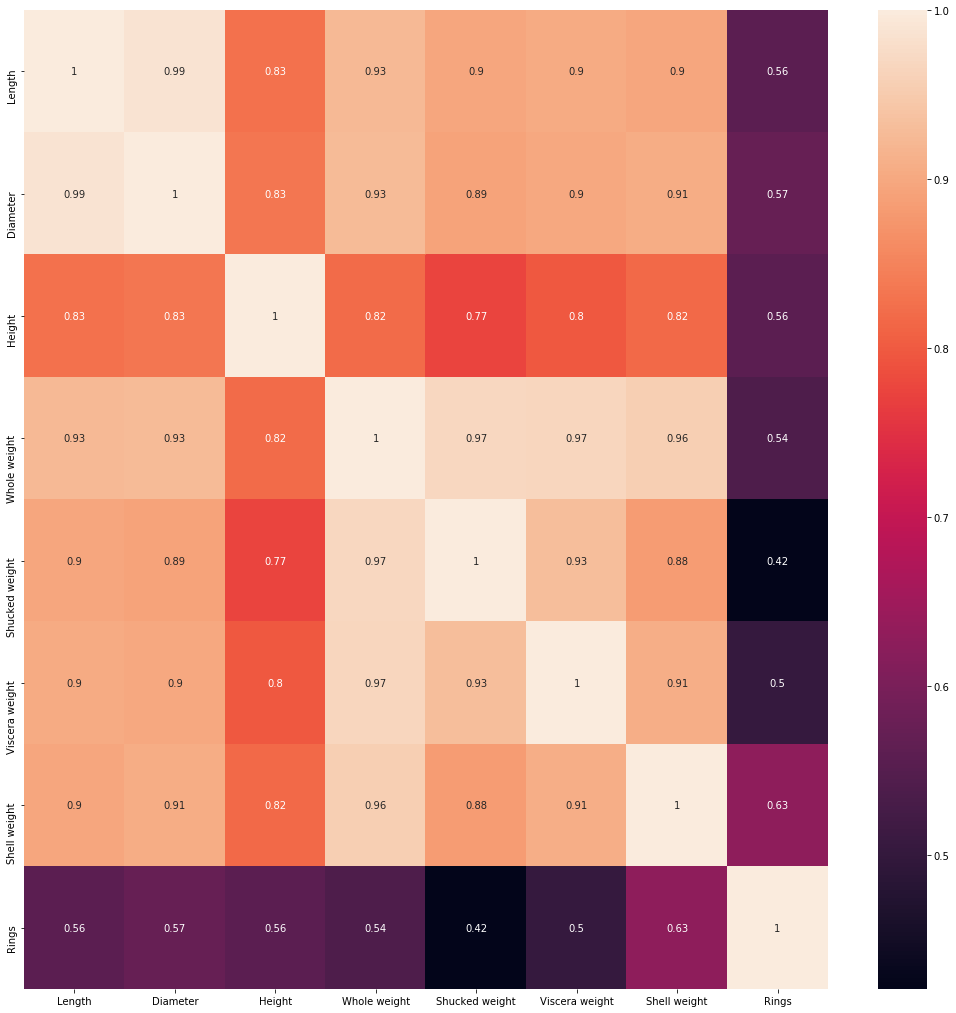

In [22]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(),annot=True)

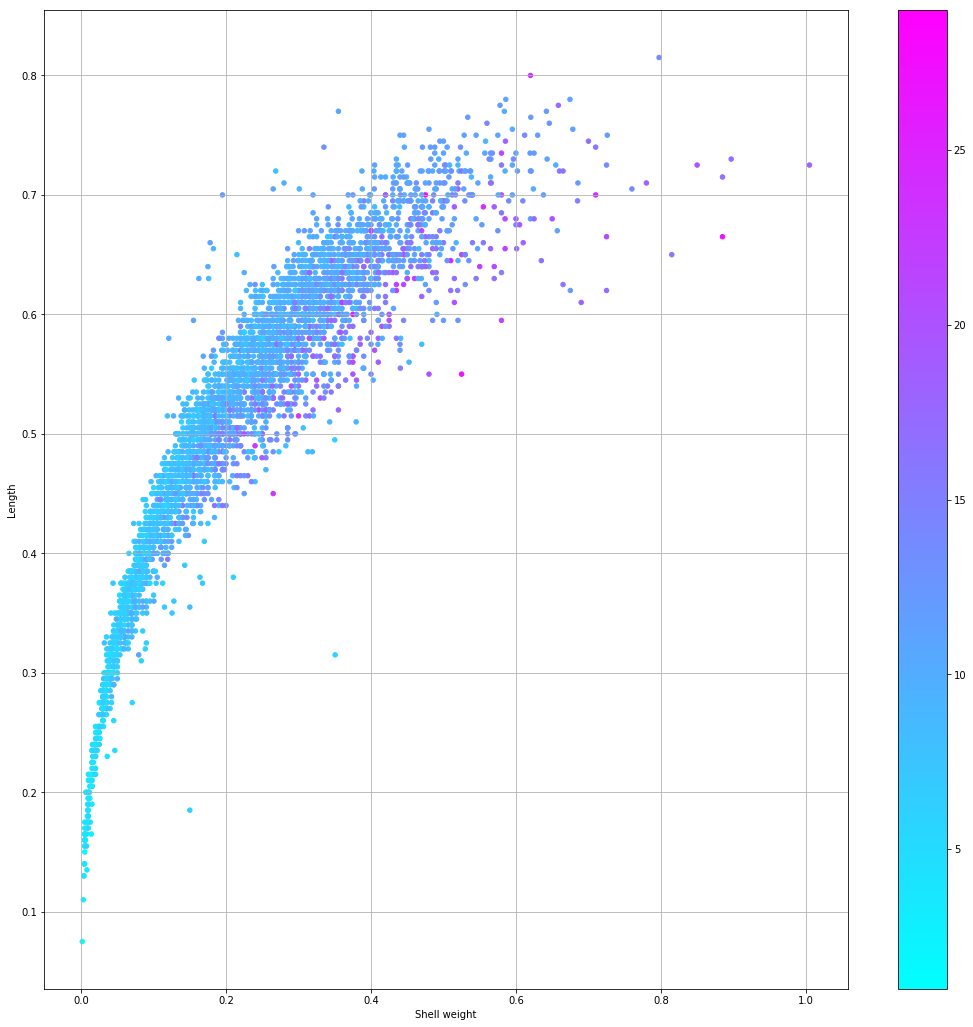

In [72]:
df_small = df[['Shell weight','Length']]
df_color = df[['Rings']]
df_small.plot.scatter(x='Shell weight',y='Length',c=df_color.values[:,0],cmap=pylab.cm.cool,figsize=(18,18),grid =True,sharex=False)

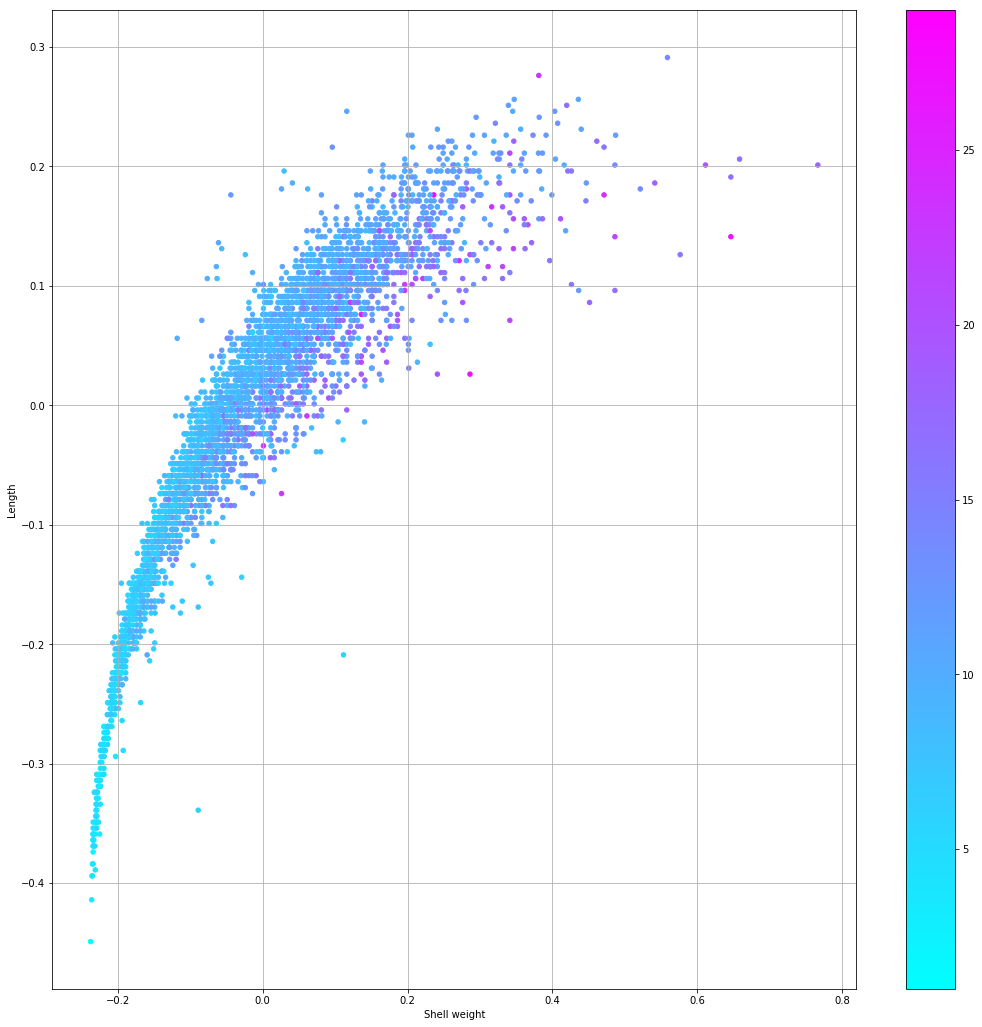

In [71]:
# make the data zero mean
df_mean = df_small.mean()
df_small_mean = df_small - df_mean
df_small_mean.plot.scatter(x='Shell weight',y='Length',c=df_color.values[:,0],cmap=pylab.cm.cool,figsize=(18,18),grid =True,sharex=False)

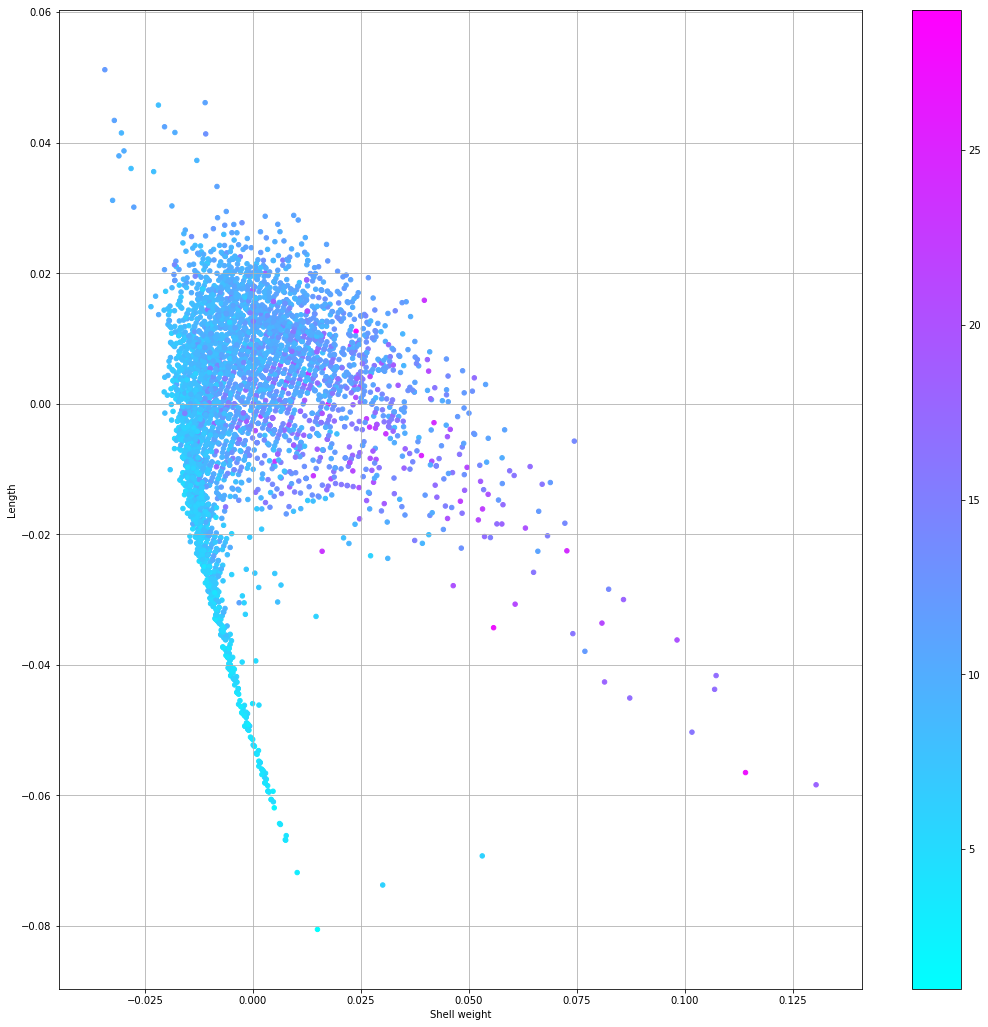

In [88]:
# whiting
from numpy import dot
df_small_mean_temp = df_small_mean.T.dot(df_small_mean)
e_value,e_vector = np.linalg.eig(df_small_mean_temp)
e_value_dig = np.diag(e_value)
df_small_white = dot(e_vector,np.sqrt(np.linalg.inv(e_value_dig)))
df_small_white = dot(df_small_white,e_vector.T)
df_small_white = dot(df_small_white,df_small_mean.T).T
df_small_white = pd.DataFrame(df_small_white)
df_small_white.columns = ['Shell weight','Length']
df_small_white.plot.scatter(x='Shell weight',y='Length',c=df_color.values[:,0],cmap=pylab.cm.cool,figsize=(18,18),grid =True,sharex=False)